In [2]:
#!/usr/bin/python
# -*- encoding: utf-8 -*-
'''
@File    :   ida.ipynb
@Time    :   2022/05/08 09:18:42
@Author  :   Mengfan Wei
@Contact :   1916261090@qq.com
'''

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# plt.style.use('seaborn-darkgrid')

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Load Data

In [30]:
# label = pd.read_csv("label.csv", header=None, names=['id_paper','class'], index_col="id_paper")
# label = pd.read_csv("label.csv", header=None, index_col=0)
dataset = pd.read_csv("cora.csv", sep='\t', header=None)
# label.set_index('id_paper')
dataset.iloc[:,0] = pd.DataFrame(np.arange(2708)) 

In [31]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Columns: 1435 entries, 0 to 1434
dtypes: int64(1434), object(1)
memory usage: 29.6+ MB


In [32]:
dataset.iloc[:,-1].value_counts()

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: 1434, dtype: int64

In [33]:
dataset = dataset.replace(['Neural_Networks','Probabilistic_Methods','Genetic_Algorithms',
                   'Theory', 'Case_Based', 'Reinforcement_Learning','Rule_Learning'],
                   ['NN','PM','GA','TH','CB','RE','RU'])

In [35]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NN
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,RU
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RE
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RE
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PM


# 2. Try different model

In [36]:
from sklearn.model_selection import train_test_split
# 划分训练集与测试集
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
X_train, y_train = train_set.iloc[:,1:-1], train_set.iloc[:,-1]
X_test, y_test = test_set.iloc[:,1:-1], test_set.iloc[:,-1]

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2166, 1433), (2166,), (542, 1433), (542,))

In [37]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## 2.1 linear model

In [162]:
# 使用基于SGD的线性模型
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(alpha=0.01,random_state=42, early_stopping=True)
sgd_clf.fit(X_train, y_train)
print("Train precision",sgd_clf.score(X_train, y_train))
print("Test precision:",sgd_clf.score(X_test, y_test))

/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train precision 0.8356417359187442
Test precision: 0.7287822878228782


Saving figure Learning curve of sgd_clf2


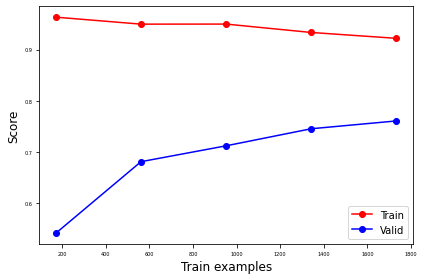

In [95]:
# 绘制学习曲线
from sklearn.model_selection import learning_curve
def plot_learning_curves(clf):
    train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train,random_state=42,scoring="accuracy")
    train_score_mean = np.mean(train_scores, axis=1)
    valid_score_mean = np.mean(valid_scores, axis=1)

    plt.plot(train_sizes, train_score_mean, 'o-', color = "r", label="Train")
    plt.plot(train_sizes, valid_score_mean, 'o-', color = "b", label="Valid")
    plt.xlabel("Train examples", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend(loc="best")
    
plot_learning_curves(sgd_clf)
save_fig("Learning curve of sgd_clf2")
plt.show()

Saving figure Confusion_matrix of sgd_clf


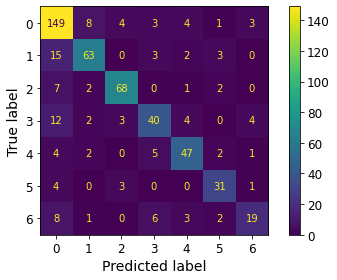

In [124]:
# 绘制混淆矩阵
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(sgd_clf, X_test, y_test)
save_fig("Confusion_matrix of sgd_clf")
plt.show()

Saving figure Normalized confusion_matrix of sgd_clf


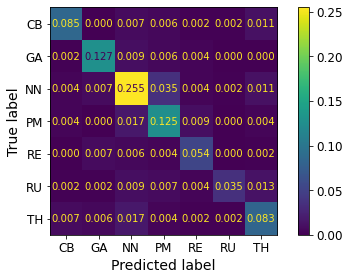

In [55]:
# 绘制normalize混淆矩阵
ConfusionMatrixDisplay.from_estimator(sgd_clf, X_test, y_test,normalize='all', values_format=".3f")
save_fig("Normalized confusion_matrix of sgd_clf")
plt.show()

In [189]:
# 输出分类报告
from sklearn.metrics import classification_report

y_pred_sgd = sgd_clf.predict(X_test)
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       172
           1       0.76      0.70      0.73        86
           2       0.88      0.76      0.82        80
           3       0.61      0.65      0.63        65
           4       0.81      0.69      0.74        61
           5       0.89      0.64      0.75        39
           6       0.92      0.31      0.46        39

    accuracy                           0.73       542
   macro avg       0.79      0.66      0.70       542
weighted avg       0.75      0.73      0.72       542



## 2.2 Support vector machine 

In [160]:
# 训练SVM分类器并在训练集上进行网格搜索
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# C_range = np.logspace(-6, 3, 10)
# gamma_range = np.logspace(-7, 2, 10)

C_range = np.logspace(-5, 4, 10, base=2)
gamma_range = np.logspace(-7, 2, 10, base=2)
param_grid_svm = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svm_clf = GridSearchCV(SVC(probability=True), param_grid=param_grid_svm, cv=cv)


In [120]:
svm_clf.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
     % (svm_clf.best_params_,svm_clf.best_score_))

/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataC

The best parameters are {'C': 4.0, 'gamma': 0.03125} with a score of 0.76


In [22]:
# 尝试使用LinearSVC
from sklearn.svm import LinearSVC
C_range2 = np.logspace(-7, 3, 10)
param_grid_svm2 = dict(C=C_range2)
svm2_clf = GridSearchCV(LinearSVC(), param_grid=param_grid_svm2, cv=cv, n_jobs=-1)

In [23]:
svm2_clf.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.4f"
     % (svm2_clf.best_params_,svm2_clf.best_score_))

/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the numb

The best parameters are {'C': 0.03593813663804626} with a score of 0.7710


In [121]:
print("Train precision and Test precision: ",svm_clf.score(X_train, y_train),svm_clf.score(X_test, y_test))

Train precision and Test precision:  0.9856879039704525 0.7546125461254612


In [110]:
print("Train precision and Test precision: ",svm2_clf.score(X_train, y_train),svm2_clf.score(X_test, y_test))

Train precision and Test precision:  0.8559556786703602 0.6697416974169742


Saving figure Confusion_matrix of svm_clf


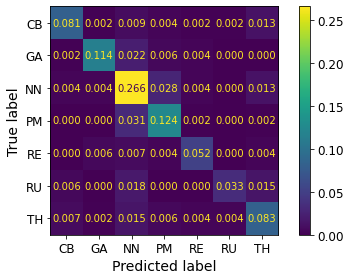

In [62]:
# 绘制混淆矩阵
ConfusionMatrixDisplay.from_estimator(svm_clf, X_test, y_test, normalize='all', values_format=".3f")
save_fig("Confusion_matrix of svm_clf")
plt.show()

In [75]:
# 输出svm_clf分类器的分类报告
y_pred_svm= svm_clf.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          CB       0.81      0.72      0.77        61
          GA       0.90      0.78      0.83        80
          NN       0.72      0.84      0.77       172
          PM       0.73      0.78      0.75        86
          RE       0.78      0.72      0.75        39
          RU       0.86      0.46      0.60        39
          TH       0.64      0.69      0.67        65

    accuracy                           0.75       542
   macro avg       0.78      0.71      0.73       542
weighted avg       0.76      0.75      0.75       542



## 2.3 Random forest 

In [161]:
# 训练随机森林分类器并在训练集上进行网格搜索
from sklearn.ensemble import RandomForestClassifier

n_estimators_range = np.arange(10, 111, 5)
min_samples_split_range = np.arange(3, 20, 2)
param_grid_forest = dict(n_estimators=n_estimators_range,
                        min_samples_split = min_samples_split_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
forest_clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid=param_grid_forest, cv=cv)

In [127]:
forest_clf.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.4f"
     % (forest_clf.best_params_,forest_clf.best_score_))

/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mf/Downloads/miniconda3-py37/en

The best parameters are {'min_samples_split': 3, 'n_estimators': 100} with a score of 0.7571


In [88]:
print("Train precision and Test precision: ",forest_clf.score(X_train, y_train),forest_clf.score(X_test, y_test))

Train precision and Test precision:  0.9783010156971376 0.7546125461254612


Saving figure Confusion_matrix of forest_clf


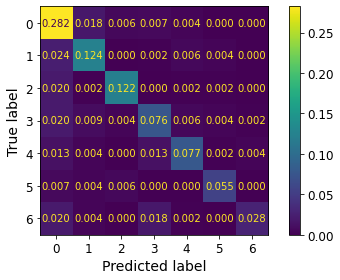

In [128]:
ConfusionMatrixDisplay.from_estimator(forest_clf, X_test, y_test, normalize='all', values_format=".3f")
save_fig("Confusion_matrix of forest_clf")
plt.show()

## 2.4 Neural network 

In [61]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)

# 该函数在给定一组超参数下构建并编译模型
def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-3, input_shape=[1433]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(7, activation="softmax"))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [ ]:
# 将标签转为数字
y_train = y_train.replace(['NN','PM','GA','TH','CB','RE','RU'], [0,1,2,3,4,5,6])
y_test = y_test.replace(['NN','PM','GA','TH','CB','RE','RU'], [0,1,2,3,4,5,6])

In [107]:
# 由于超参数很多，采用随机搜索
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# 通过Wrapper类来使用Scikit-Learn中的方法和函数
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

# 在训练集上划分验证集，用于early_stopping
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# 保存在验证集上的性能达到最好时的模型
# checkpoint_cb = keras.callbacks.ModelCheckpoint("nn_clf.h5", save_best_only=True)
# 10轮无进展，停止训练
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) 

param_distribs = {
    "n_hidden": [1, 2, 3, 4],
    "n_neurons": np.arange(100, 321, 20)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(50).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, cv=5, verbose=1, n_jobs=-1)

In [108]:
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[early_stopping_cb])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


2022-05-27 15:56:22.672193: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-05-27 15:56:22.679886: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-05-27 15:56:22.680173: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-05-27 15:56:22.682184: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-05-27 15:56:22.699076: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-05-27 15:56:22.705901: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-05-27 15:56:22.726710: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic libr

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
55/55 [==============================] - 1s 12ms/step - loss: 1.9488 - accuracy: 0.1443 - val_loss: 1.9353 - val_accuracy: 0.1636s - loss: 1.9014 - accuracy: 0.26
Epoch 2/100
19/55 [=========>....................] - 1s 12ms/step - loss: 1.8854 - accuracy: 0.2827 - val_loss: 1.8357 - val_accuracy: 0.3041
 - ETA: 0s - loss: 1.9605 - accuracy: 0.1332Epoch 2/100
55/55 [==============================] - 1s 14ms/step - loss: 1.9666 - accuracy: 0.1056 - val_loss: 1.9551 - val_accuracy: 0.1406
Epoch 2/100
Epoch 2/100
55/55 [==============================] - 1s 13ms/step - loss: 1.8925 - accuracy: 0.2701 - val_loss: 1.8295 - val_accuracy: 0.3041
Epoch 2/100
55/55 [==============================] - 1s 11ms/step - loss: 1.9334 - accuracy: 0.1598 - val_loss: 1.9350 - val_accuracy: 0.1682
Epoch 2/100
55/55 [==============

55/55 [==============================] - 1s 16ms/step - loss: 0.4411 - accuracy: 0.8886 - val_loss: 0.5246 - val_accuracy: 0.8433s - loss: 0.3892 - accuracy: 0.92
Epoch 83/100
30/55 [===============>..............] - ETA: 0s - loss: 0.0266 - accuracy: 0.9990 - 1s 16ms/step - loss: 0.4180 - accuracy: 0.8979 - val_loss: 0.4760 - val_accuracy: 0.8756
Epoch 86/100
55/55 [==============================] - 1s 17ms/step - loss: 0.0271 - accuracy: 0.9983 - val_loss: 0.1934 - val_accuracy: 0.9401s - loss: 0.4299 - accuracy: 0.89
Epoch 85/100
55/55 [==============================] - 1s 16ms/step - loss: 0.4032 - accuracy: 0.9146 - val_loss: 0.4734 - val_accuracy: 0.8779
Epoch 84/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0280 - accuracy: 0.9994 - val_loss: 0.1919 - val_accuracy: 0.9516
Epoch 84/100
55/55 [==============================] - 1s 16ms/step - loss: 1.4690 - accuracy: 0.4893 - val_loss: 1.4621 - val_accuracy: 0.4539
Epoch 89/100
11/55 [=====>...................

55/55 [==============================] - 2s 33ms/step - loss: 0.0732 - accuracy: 0.9919 - val_loss: 0.2167 - val_accuracy: 0.9493s - loss: 1.3589 - accuracy: 0.50
Epoch 70/100
55/55 [==============================] - 2s 33ms/step - loss: 0.0467 - accuracy: 0.9960 - val_loss: 0.2016 - val_accuracy: 0.9424
Epoch 89/100
55/55 [==============================] - 2s 34ms/step - loss: 1.7045 - accuracy: 0.3006 - val_loss: 1.6915 - val_accuracy: 0.3134
Epoch 59/100
55/55 [==============================] - 2s 33ms/step - loss: 1.6730 - accuracy: 0.3006 - val_loss: 1.6617 - val_accuracy: 0.3065
Epoch 61/100
25/55 [============>.................]Epoch 71/100
 - ETA: 0s - loss: 1.7421 - accuracy: 0.2188Epoch 58/100
55/55 [==============================] - 0s 7ms/step - loss: 1.0958 - accuracy: 0.7109 - val_loss: 1.1059 - val_accuracy: 0.6751
Epoch 53/100
Epoch 54/100
55/55 [==============================] - 0s 9ms/step - loss: 0.0709 - accuracy: 0.9919 - val_loss: 0.2168 - val_accuracy: 0.9470
Epo

In [109]:
rnd_search_cv.score(X_test, y_test)

17/17 [==============================] - 0s 556us/step - loss: 1.0238 - accuracy: 0.7546


0.7546125650405884

In [110]:
rnd_search_cv.score(X_train, y_train)

68/68 [==============================] - 0s 476us/step - loss: 0.0276 - accuracy: 0.9986


0.9986149668693542

In [114]:
print(rnd_search_cv.best_params_)

{'n_neurons': 220, 'n_hidden': 2, 'learning_rate': 0.015114528288059986}


In [97]:
# nn_clf = keras.models.Sequential([
#     keras.layers.InputLayer(input_shape=(1433,)),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(7, activation="softmax")
# ])

# nn_clf.compile(loss="sparse_categorical_crossentropy",
#               optimizer=keras.optimizers.SGD(learning_rate=1e-2),
#               metrics=["accuracy"])

In [72]:
# nn_clf.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 300)               430200    
_________________________________________________________________
dense_117 (Dense)            (None, 150)               45150     
_________________________________________________________________
dense_118 (Dense)            (None, 75)                11325     
_________________________________________________________________
dense_119 (Dense)            (None, 7)                 532       
Total params: 487,207
Trainable params: 487,207
Non-trainable params: 0
_________________________________________________________________


In [98]:
# history = nn_clf.fit(X_train_, y_train_, epochs=100, 
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
55/55 [==============================] - 0s 2ms/step - loss: 1.9254 - accuracy: 0.2263 - val_loss: 1.8994 - val_accuracy: 0.2834
Epoch 2/100
55/55 [==============================] - 0s 1ms/step - loss: 1.8735 - accuracy: 0.2956 - val_loss: 1.8555 - val_accuracy: 0.3111
Epoch 3/100
55/55 [==============================] - 0s 1ms/step - loss: 1.8352 - accuracy: 0.2962 - val_loss: 1.8236 - val_accuracy: 0.3041
Epoch 4/100
55/55 [==============================] - 0s 1ms/step - loss: 1.8064 - accuracy: 0.2968 - val_loss: 1.7987 - val_accuracy: 0.3041
Epoch 5/100
55/55 [==============================] - 0s 1ms/step - loss: 1.7822 - accuracy: 0.2968 - val_loss: 1.7795 - val_accuracy: 0.3041
Epoch 6/100
55/55 [==============================] - 0s 1ms/step - loss: 1.7606 - accuracy: 0.2968 - val_loss: 1.7592 - val_accuracy: 0.3041
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 1.7377 - accuracy: 0.2968 - val_loss: 1.7391 - val_accuracy: 0.3041
Epoch 8/100
5

## 2.5 Ensemble_learning - voting

In [194]:
# 使用软投票集成前面的3个分类器
from sklearn.ensemble import RandomForestClassifier

y_train = y_train.replace([0,1,2,3,4,5,6], ['NN','PM','GA','TH','CB','RE','RU'])
y_test = y_test.replace([0,1,2,3,4,5,6], ['NN','PM','GA','TH','CB','RE','RU'])

# sgd_clf2与sgd_clf1一致，svm_clf2与forest_clf2采用前面网格搜索出的最佳参数初始化
sgd_clf2 = SGDClassifier(alpha=0.01,random_state=42, early_stopping=True, loss="log")
svm_clf2 = SVC(C=4, gamma=0.03125, probability=True)
forest_clf2 = RandomForestClassifier(n_estimators=100, min_samples_split=3)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[("sgd", sgd_clf2 ), ('svc', svm_clf2), ('rf', forest_clf2)],
    voting='soft', n_jobs=-1)

In [195]:
voting_clf.fit(X_train, y_train)

/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.01, early_stopping=True,
                                            loss='log', random_state=42)),
                             ('svc', SVC(C=4, gamma=0.03125, probability=True)),
                             ('rf',
                              RandomForestClassifier(min_samples_split=3))],
                 n_jobs=-1, voting='soft')

In [183]:
voting_clf.score(X_train, y_train)

0.9903047091412742

In [196]:
for clf in (sgd_clf2, svm_clf2, forest_clf2, voting_clf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_test, y_test))

/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier 0.7287822878228782


/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.7527675276752768


/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier 0.7546125461254612


/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mf/Downloads/miniconda3-py37/envs/tf2.6/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.7656826568265682


Saving figure Confusion_matrix of voting_clf


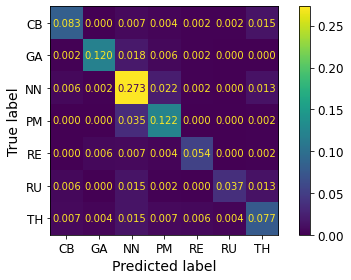

In [197]:
ConfusionMatrixDisplay.from_estimator(voting_clf, X_test, y_test, normalize='all', values_format=".3f")
save_fig("Confusion_matrix of voting_clf")
plt.show()

In [198]:
y_pred_voting= voting_clf.predict(X_test)
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

          CB       0.80      0.74      0.77        61
          GA       0.92      0.81      0.86        80
          NN       0.74      0.86      0.79       172
          PM       0.73      0.77      0.75        86
          RE       0.83      0.74      0.78        39
          RU       0.87      0.51      0.65        39
          TH       0.64      0.65      0.64        65

    accuracy                           0.77       542
   macro avg       0.79      0.73      0.75       542
weighted avg       0.77      0.77      0.76       542



### 2.6 Pagerank

In [ ]:
def pagerank():
    # 读入有向图，存储边
    f = open('cora.cites', 'r')
    edges = [line.strip('\n').split(' ') for line in f]
    # print(edges)
 
    # 根据边获取节点的集合
    nodes = []
    for edge in edges:
        if edge[0] not in nodes:
            nodes.append(edge[0])
        if edge[1] not in nodes:
            nodes.append(edge[1])
    # print(nodes)
 
    N = len(nodes)
 
    # 生成初步的S矩阵
    S = np.zeros([N, N])
    for edge in edges:
        S[edge[1], edge[0]] = 1
    print(S)
 
    # 计算比例：即一个网页对其他网页的PageRank值的贡献，即进行列的归一化处理
    for j in range(N):
        sum_of_col = sum(S[:,j])
        for i in range(N):
            if sum_of_col!=0:
                S[i,j] /= sum_of_col
            else:
                S[i,j] = 1/N
    print(S)
 
    # 计算矩阵A
    alpha = 0.85
    A = alpha*S + (1-alpha) / N * np.ones([N, N])
    print(A)
 
    # 生成初始的PageRank值，记录在P_n中，P_n和P_n1均用于迭代
    P_n = np.ones(N) / N
    P_n1 = np.zeros(N)
 
    e = 100000  # 误差初始化
    k = 0   # 记录迭代次数
    print('loop...')
 
    while e > 0.00000001:   # 开始迭代
        P_n1 = np.dot(A, P_n)   # 迭代公式
        e = P_n1-P_n
        e = max(map(abs, e))    # 计算误差
        P_n = P_n1
        k += 1
        print('iteration %s:'%str(k), P_n1)
 
    print('final result:', P_n)